In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [14]:
plt.rcParams['figure.figsize'] = (40,20)

In [3]:
df_places = gpd.read_file('china2.json')

In [4]:
df_places.dropna(how='any')

,id,size,name,childNum,population,geometry
0,65,550,新疆维吾尔自治区,18,"21,813,334","POLYGON ((96.416 42.7588, 96.416 42.7148, 95.9..."
1,54,550,西藏自治区,7,"3,002,166","POLYGON ((79.0137 34.3213, 79.1016 34.4531, 79..."
2,15,450,内蒙古自治区,12,"24,706,321","POLYGON ((97.20699999999999 42.8027, 99.4922 4..."
3,63,800,青海省,8,"5,626,722","POLYGON ((89.7363 36.0791, 89.9121 36.0791, 90..."
4,51,900,四川省,21,"80,418,200","POLYGON ((101.7773 33.5303, 101.8652 33.5742, ..."
5,23,700,黑龙江省,13,"38,312,224","POLYGON ((121.4648 53.3496, 123.6621 53.5693, ..."
6,62,690,甘肃省,14,"25,575,254","POLYGON ((96.416 42.7148, 97.20699999999999 42..."
7,53,1200,云南省,16,"45,966,239","POLYGON ((98.1738 28.125, 98.2617 28.3887, 98...."
8,45,1450,广西壮族自治区,14,"46,026,629","POLYGON ((104.502 24.7412, 104.6777 24.6094, 1..."
9,43,1700,湖南省,14,"65,683,722","POLYGON ((109.248 28.4766, 109.248 29.1357, 10..."


In [5]:
df_places['population'] = df_places['population'].str.replace(',','')

In [6]:
print(type(df_places.loc[0,'population']))

<class 'str'>


In [27]:
df_places['population'] = pd.to_numeric(df_places['population'], errors='coerce')

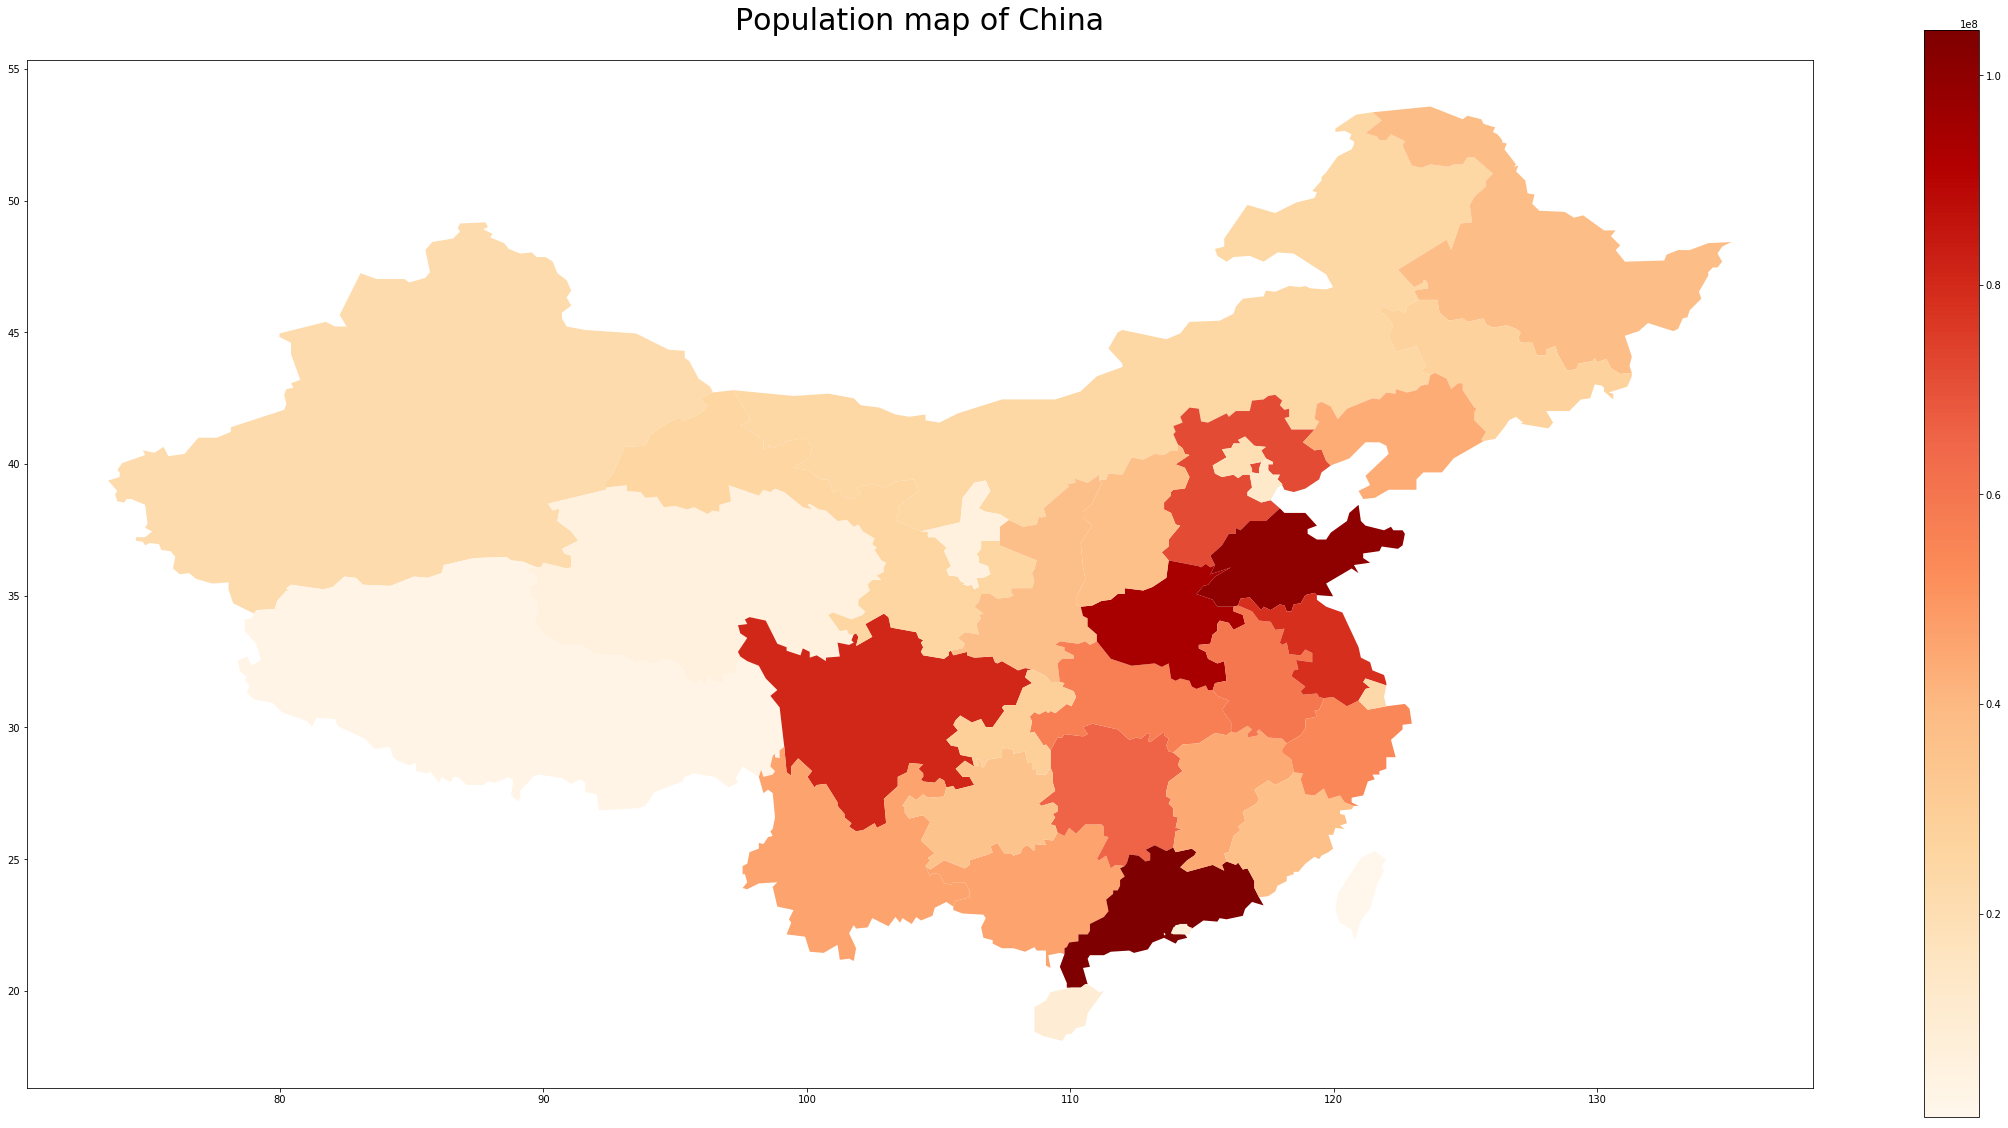

In [34]:
fig, ax = plt.subplots(1, 1)
plt.title("Population map of China", fontsize=30, pad=30)
df_places.plot(column='population', ax=ax, legend=True, cmap='OrRd')